In [102]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [103]:
Dataset=pd.read_csv('ResumeDataSet.csv',encoding='utf-8')
Dataset['cleaned_resume']=''
Dataset.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [104]:
print("Displaying the distinct categories of resume -",Dataset['Category'].unique())

Displaying the distinct categories of resume - ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [105]:
print("Displaying the distinct categories of resume -",Dataset['Category'].value_counts())

Displaying the distinct categories of resume - Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Category'>

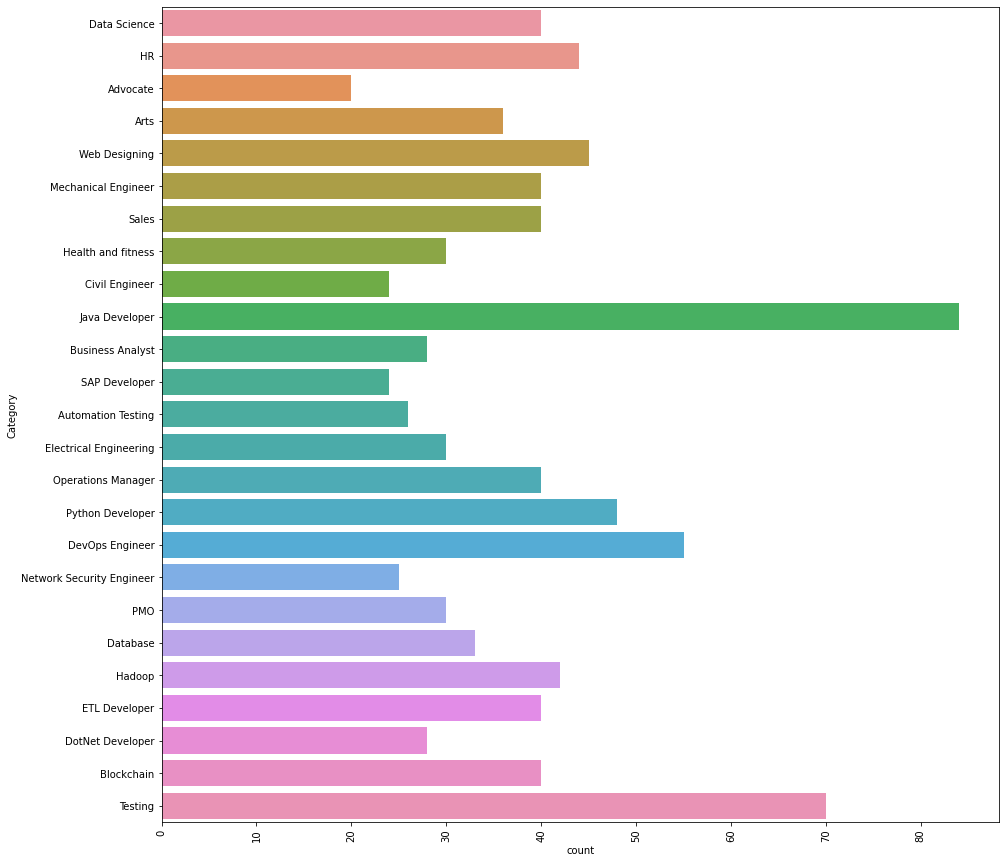

In [106]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category",data=Dataset)

Visulization the Distribution of Categories.

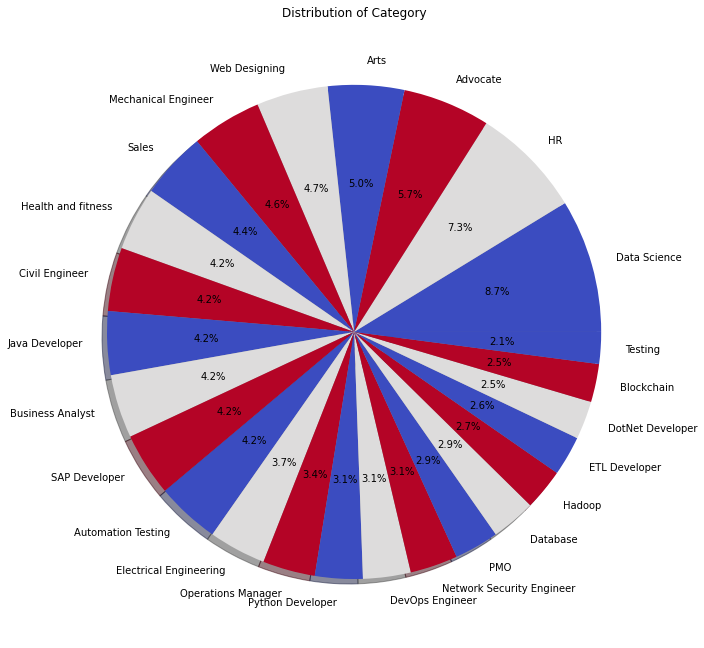

In [107]:
from matplotlib.gridspec import GridSpec
targetCounts=Dataset['Category'].value_counts()
targetLabels=Dataset['Category'].unique()
plt.figure(1,figsize=(25,25))
the_grid=GridSpec(2,2)
cmap=plt.get_cmap('coolwarm')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_grid[0,1],aspect=1, title='Distribution of Category')
source_pie=plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%',shadow=True, colors=colors)

## Data Cleaning Processing, removing the symbol, HTML tag

In [108]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
Dataset['cleaned_resume'] = Dataset.Resume.apply(lambda x: cleanResume(x))

In [109]:
print(Dataset)

         Category                                             Resume  \
0    Data Science  Skills * Programming Languages: Python (pandas...   
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2    Data Science  Areas of Interest Deep Learning, Control Syste...   
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   
..            ...                                                ...   
957       Testing  Computer Skills: â¢ Proficient in MS office (...   
958       Testing  â Willingness to accept the challenges. â ...   
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...   
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...   
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...   

                                        cleaned_resume  
0    Skills Programming Languages Python pandas num...  
1    Education Detail

In [110]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = Dataset['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


In [111]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    Dataset[i] = le.fit_transform(Dataset[i])
    


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText=Dataset['cleaned_resume'].values
requiredTarget=Dataset['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)
print(WordFeatures)

  (0, 1497)	0.030442872257393377
  (0, 1484)	0.034531750632907525
  (0, 1482)	0.1138465211736939
  (0, 1460)	0.07093131129419672
  (0, 1451)	0.033309013428457386
  (0, 1442)	0.03203670321153616
  (0, 1440)	0.08546898208818157
  (0, 1439)	0.04080461724681855
  (0, 1436)	0.05680440806960008
  (0, 1420)	0.04659756799177676
  (0, 1419)	0.0503923714674369
  (0, 1389)	0.08368776039571268
  (0, 1388)	0.11957568503304351
  (0, 1382)	0.0636917041233275
  (0, 1376)	0.1487996917738002
  (0, 1371)	0.06899078914578757
  (0, 1365)	0.0531162184530022
  (0, 1364)	0.0815286030249583
  (0, 1362)	0.05813765391929385
  (0, 1358)	0.025538351209887553
  (0, 1344)	0.1499576218829958
  (0, 1343)	0.05681550781284476
  (0, 1309)	0.0646209141904646
  (0, 1299)	0.05319383005661842
  (0, 1286)	0.0346379947929267
  :	:
  (961, 336)	0.13437601229264157
  (961, 317)	0.06693311287776045
  (961, 315)	0.08639977563211801
  (961, 272)	0.025466251941105137
  (961, 258)	0.082314549875185
  (961, 243)	0.10857982774459495
  

In [100]:
X_train,X_test,y_train,y_test=train_test_split(WordFeatures,requiredTarget,random_state=0,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


## Train the model and print the classification Report

In [101]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction=clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.